# Correlation and Causation

It is hard to over-emphasize the point that **correlation is not causation**!. Variables can be highly correlated for any number of reasons, none of which imply a causal relationship.    

When trying to understand relationships between variables, it is worth the effort to think carefully and ask the question, does this relationship make sense? In this exercise you will explore a case where correlation appears to arise from **latent or hidden variables**. 

As a first step, execute the code in the cell below to import the packages you will need. 

In [1]:
import pandas as pd
import numpy as np
import numpy.random as nr
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib inline

Is there anything you can do to improve your chances of wining a Nobel Prize? Let's have a look at some data and decide if the correlations make any sense?

Now, execute the code in the cell below and examine the first 10 rows of the data frame.

In [2]:
Nobel_chocolate = pd.read_csv('nobel-chocolate.csv', thousands=',')
print('Dimensions of the data frame = ', Nobel_chocolate.shape)
Nobel_chocolate

Dimensions of the data frame =  (19, 5)


,Country,Laureates10_million,Chocolate,Nobellaureates,Population
0,Switzerland,32.771,8.8,28,8544034
1,Sweden,30.052,8.1,30,9982709
2,Austria,25.138,7.9,22,8751820
3,Denmark,24.329,7.9,14,5754356
4,Norway,24.284,6.6,13,5353363
5,Ireland,14.572,5.8,7,4803748
6,Germany,13.245,5.7,109,82293457
7,United States,11.721,5.6,383,326766748
8,France,10.664,5.4,70,65233271
9,Finland,9.021,5.0,5,5542517


The nation of China is a bit of an outlier. While people in China win a reasonable number of Nobel prizes, the huge population skews the changes of winning per person. 

To get a feel for these data, create a scatter plot of Nobel prizes vs. chocolate consumption by executing the code in the cell below. 

Text(0.5, 1.0, 'Nobel Prizes vs. Chocolate Consumption')

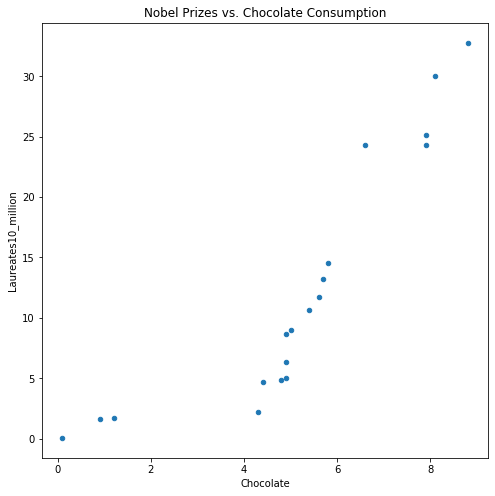

In [3]:
## Define a figure and axes and make a scatter plot
fig = plt.figure(figsize=(8, 8)) # define plot area
ax = fig.gca() # define axis 
Nobel_chocolate.plot.scatter('Chocolate', 'Laureates10_million', ax = ax) # Scatter plot
ax.set_title('Nobel Prizes vs. Chocolate Consumption') # Give the plot a main title

What is the correlation between Nobel prizes and chocolate consumption? To find out, execute the code in the cell below.

> Note: The Pandas corr method de-means each column before computing correlation.

In [4]:
Nobel_chocolate[['Laureates10_million', 'Chocolate']].corr()

,Laureates10_million,Chocolate
Laureates10_million,1.000000,0.878087
Chocolate,0.878087,1.000000


There seems to be a high correlation between the number of Nobel prizes and chocolate consumption. 

What about the relationship between the log of Nobel prizes and chocolate consumption? Execute the code in the cell below and examine the resulting plot.

Text(0, 0.5, 'Log Nobel Prizes per 10 Million People')

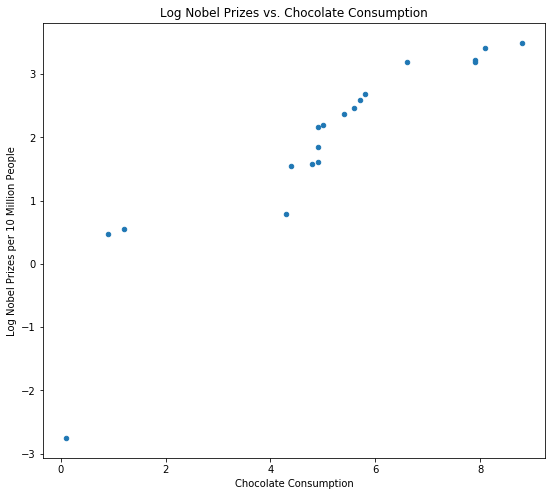

In [5]:
Nobel_chocolate['log_Nobel'] = np.log(Nobel_chocolate.Laureates10_million)

## PLot the log Nobel vs. chocolate
fig = plt.figure(figsize=(9, 8)) # define plot area
ax = fig.gca() # define axis 
Nobel_chocolate.plot.scatter('Chocolate', 'log_Nobel', ax = ax) # Scatter plot
ax.set_title('Log Nobel Prizes vs. Chocolate Consumption') # Give the plot a main title
ax.set_xlabel('Chocolate Consumption') # Set text for the x axis
ax.set_ylabel('Log Nobel Prizes per 10 Million People')# Set text for y axis

This looks like fairly straight line relationship, with the exception of an outlier, China.  

What is the correlation between log of Nobel prizes and chocolate consumption? Execute the code in the cell below to find out.

In [6]:
Nobel_chocolate[['log_Nobel', 'Chocolate']].corr()

,log_Nobel,Chocolate
log_Nobel,1.000000,0.908148
Chocolate,0.908148,1.000000


This correlation is even higher than for the untransformed relationship. But, does this make any sense in terms of a causal relationship? Can eating chocolate really improve someone's chances of winning a Nobel prize? 

Perhaps some other variable makes more sense for finding a causal relationship? GDP per person could be a good choice. Execute the code in the cell below to load the GDP data.

In [7]:
GDP = pd.read_csv('GDP_Country.csv')
print(GDP)

           Country  GDP_billions
0      Switzerland           679
1           Sweden           538
2          Austria           417
3          Denmark           325
4           Norway           399
5          Ireland           334
6          Germany          3677
7    United States         19390
8           France          2583
9          Finland           252
10         Belgium           493
11     New Zealand           206
12          Poland           525
13       Australia          1323
14  Czech Republic           216
15           Japan          4872
16    South Africa           349
17          Russia          1578
18           China         12240


There are now two data tables (Pandas data frames). These data tables must be joined and the GDP per person computed. Execute the code in the cell below to perform these operations and examine the resulting data frame. 

In [8]:
Nobel_chocolate = Nobel_chocolate.merge(right=GDP, how='left', left_on='Country', right_on='Country')
Nobel_chocolate['GDP_person_thousands'] = 1000000 * np.divide(Nobel_chocolate.GDP_billions, Nobel_chocolate.Population)
Nobel_chocolate

,Country,Laureates10_million,Chocolate,Nobellaureates,Population,log_Nobel,GDP_billions,GDP_person_thousands
0,Switzerland,32.771,8.8,28,8544034,3.489544,679,79.470658
1,Sweden,30.052,8.1,30,9982709,3.402929,538,53.893187
2,Austria,25.138,7.9,22,8751820,3.224381,417,47.647232
3,Denmark,24.329,7.9,14,5754356,3.191669,325,56.478953
4,Norway,24.284,6.6,13,5353363,3.189818,399,74.532588
5,Ireland,14.572,5.8,7,4803748,2.679102,334,69.529043
6,Germany,13.245,5.7,109,82293457,2.583620,3677,44.681560
7,United States,11.721,5.6,383,326766748,2.461382,19390,59.338963
8,France,10.664,5.4,70,65233271,2.366874,2583,39.596359
9,Finland,9.021,5.0,5,5542517,2.199555,252,45.466708


Let's examine the relationship between GDP per person and the number of Nobel prizes. Execute the code in the cell below and examine the resulting plot. 

Text(0, 0.5, 'Log Nobel Prizes per 10 Million People')

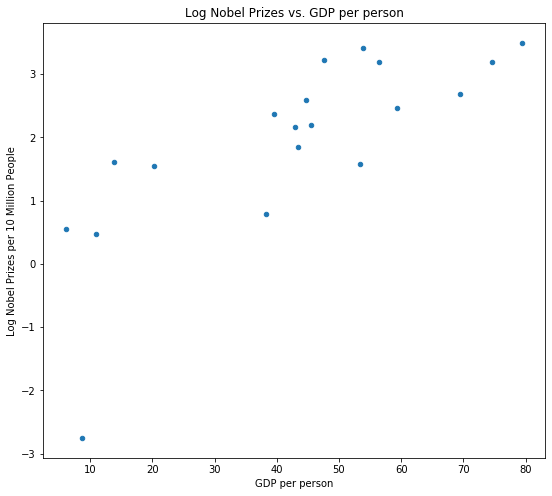

In [9]:
## PLot the log Nobel vs. GDP
fig = plt.figure(figsize=(9, 8)) # define plot area
ax = fig.gca() # define axis 
Nobel_chocolate.plot.scatter('GDP_person_thousands', 'log_Nobel', ax = ax) # Scatter plot
ax.set_title('Log Nobel Prizes vs. GDP per person') # Give the plot a main title
ax.set_xlabel('GDP per person') # Set text for the x axis
ax.set_ylabel('Log Nobel Prizes per 10 Million People')# Set text for y axis

Text(0, 0.5, 'Nobel Prizes per 10 Million People')

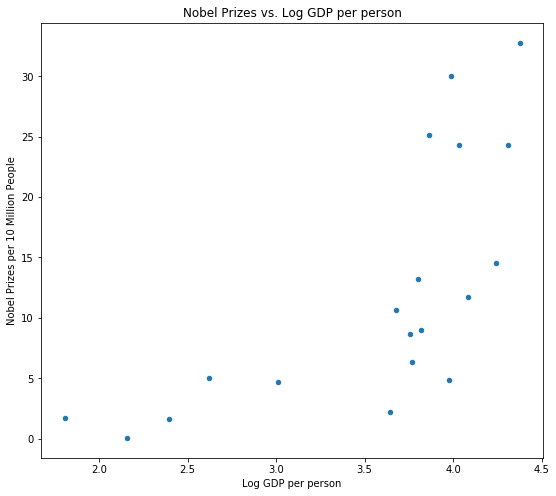

In [10]:
Nobel_chocolate['log_GDP_person_thousands'] = np.log(Nobel_chocolate.GDP_person_thousands)

fig = plt.figure(figsize=(9, 8)) # define plot area
ax = fig.gca() # define axis 
Nobel_chocolate.plot.scatter('log_GDP_person_thousands', 'Laureates10_million', ax = ax) # Scatter plot
ax.set_title('Nobel Prizes vs. Log GDP per person') # Give the plot a main title
ax.set_xlabel('Log GDP per person') # Set text for the x axis
ax.set_ylabel('Nobel Prizes per 10 Million People')# Set text for y axis

There seems to be a reasonable relationship between the GDP per person and the log of Nobel prizes per population. There is one outlier, again China. 

What is the correlation between the GDP per person and log Nobel prizes? Execute the code in the cell below and examine the results. 

In [11]:
Nobel_chocolate[['log_Nobel', 'GDP_person_thousands']].corr()

,log_Nobel,GDP_person_thousands
log_Nobel,1.000000,0.763052
GDP_person_thousands,0.763052,1.000000


GDP per person and the log of the number of Nobel prizes per population exhibits fairly high correlation. Does this relationship make more sense than the relationship with chocolate consumption? 

Is there a relationship between chocolate consumption and GDP? This seems likely. To find out, execute the code in the cell below and examine the resulting plot.

Text(0, 0.5, 'Chocolate consumption')

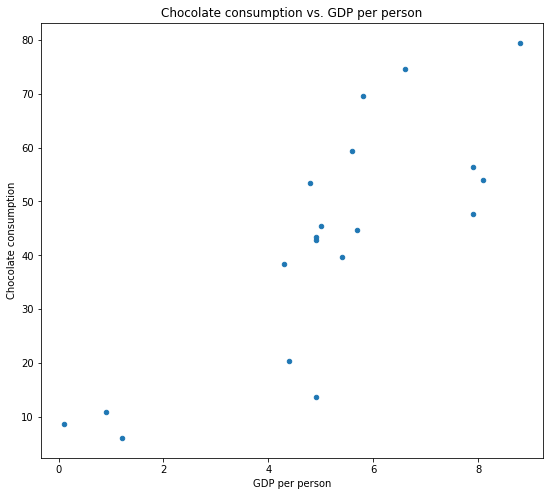

In [12]:
## PLot the chocolate consuption vs. GDP
fig = plt.figure(figsize=(9, 8)) # define plot area
ax = fig.gca() # define axis 
Nobel_chocolate.plot.scatter('Chocolate', 'GDP_person_thousands', ax = ax) # Scatter plot
ax.set_title('Chocolate consumption vs. GDP per person') # Give the plot a main title
ax.set_xlabel('GDP per person') # Set text for the x axis
ax.set_ylabel('Chocolate consumption')# Set text for y axis

Text(0, 0.5, 'Chocolate consumption')

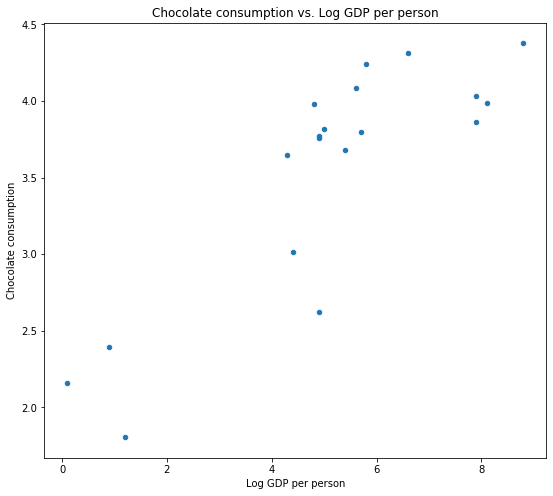

In [13]:
Nobel_chocolate['log_Chocolate'] = np.log(Nobel_chocolate.Chocolate)

fig = plt.figure(figsize=(9, 8)) # define plot area
ax = fig.gca() # define axis 
Nobel_chocolate.plot.scatter('Chocolate', 'log_GDP_person_thousands', ax = ax) # Scatter plot
ax.set_title('Chocolate consumption vs. Log GDP per person') # Give the plot a main title
ax.set_xlabel('Log GDP per person') # Set text for the x axis
ax.set_ylabel('Chocolate consumption')# Set text for y axis

The relationship looks fairly linear. 

How correlated is chocolate consumption and GDP? To answer this question, in the cell below create and execute the code to compute the correlations between three of the variables and display the results: 'Chocolate', 'GDP_person_thousands', 'log_Nobel'. Make sure you name your correlation matrix object `corr_matrix`. 

In [14]:
corr_matrix = Nobel_chocolate.loc[:,[ 'Chocolate', 'GDP_person_thousands', 'log_Nobel', 'Laureates10_million', 'log_GDP_person_thousands']].corr()
corr_matrix

,Chocolate,GDP_person_thousands,log_Nobel,Laureates10_million,log_GDP_person_thousands
Chocolate,1.000000,0.815881,0.908148,0.878087,0.847971
GDP_person_thousands,0.815881,1.000000,0.763052,0.761228,0.952227
log_Nobel,0.908148,0.763052,1.000000,0.781853,0.790101
Laureates10_million,0.878087,0.761228,0.781853,1.000000,0.684854
log_GDP_person_thousands,0.847971,0.952227,0.790101,0.684854,1.000000


Notice the relationship between GDP per population and chocolate consumption. Do you think this relationship could be causal? What about the relationship between GDP per person and Nobel prizes?

Finally, execute the code in the cell below to display a visualization of these correlations, and examine the results? 

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

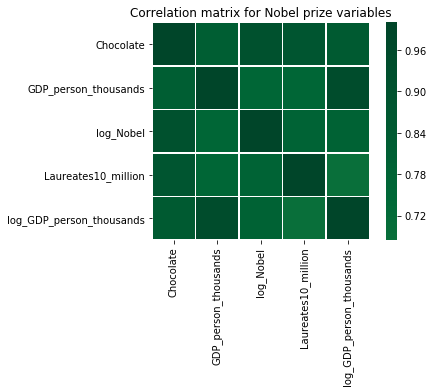

In [15]:
sns.heatmap(corr_matrix, center=0, cmap="YlGn",
            square=True, linewidths=.25) 
plt.title('Correlation matrix for Nobel prize variables')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

Notice that the correlation coefficients between all these variables is relatively high. This example illustrates the perils of trying to extract causal relationships from correlation values alone. 

Is it possible GDP has a causal relationship with both chocolate consumption and winning Nobel prizes. Are there other latent (hidden or not part of this data set) which might be important in determining causal relationships, like local tastes for chocolate, R&D spending levels in different countries? 

##### Copyright 2020, Stephen F. Elston. All rights reserved. 

In [16]:
Nobel_chocolate.loc[:,['Laureates10_million','Chocolate','GDP_person_thousands',]].describe()

,Laureates10_million,Chocolate,GDP_person_thousands
count,19.000000,19.000000,19.000000
mean,12.155368,5.115789,42.547011
std,10.273976,2.368840,21.986852
min,0.064000,0.100000,6.080307
25%,4.775000,4.600000,29.317619
50%,9.021000,5.000000,44.681560
75%,19.428000,6.200000,55.186070
max,32.771000,8.800000,79.470658


In [17]:
Nobel_chocolate.loc[:,[ 'Chocolate', 'GDP_person_thousands', 'log_Nobel', 'Laureates10_million', 'log_GDP_person_thousands']].corr(method='kendall')

,Chocolate,GDP_person_thousands,log_Nobel,Laureates10_million,log_GDP_person_thousands
Chocolate,1.000000,0.668686,0.988235,0.988235,0.668686
GDP_person_thousands,0.668686,1.000000,0.660819,0.660819,1.000000
log_Nobel,0.988235,0.660819,1.000000,1.000000,0.660819
Laureates10_million,0.988235,0.660819,1.000000,1.000000,0.660819
log_GDP_person_thousands,0.668686,1.000000,0.660819,0.660819,1.000000


In [18]:
Nobel_chocolate.loc[:,[ 'Chocolate', 'GDP_person_thousands', 'log_Nobel', 'Laureates10_million', 'log_GDP_person_thousands']].corr(method='spearman')

,Chocolate,GDP_person_thousands,log_Nobel,Laureates10_million,log_GDP_person_thousands
Chocolate,1.000000,0.846595,0.997805,0.997805,0.846595
GDP_person_thousands,0.846595,1.000000,0.849123,0.849123,1.000000
log_Nobel,0.997805,0.849123,1.000000,1.000000,0.849123
Laureates10_million,0.997805,0.849123,1.000000,1.000000,0.849123
log_GDP_person_thousands,0.846595,1.000000,0.849123,0.849123,1.000000


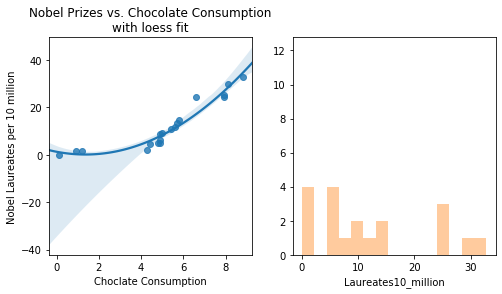

In [49]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(8,4))
sns.regplot('Chocolate', 'Laureates10_million', order=2, data=Nobel_chocolate, ax=ax1)
ax1.set_xlabel('Choclate Consumption')
ax1.set_ylabel('Nobel Laureates per 10 million')
ax1.set_title('Nobel Prizes vs. Chocolate Consumption\nwith loess fit')
sns.distplot(Nobel_chocolate.loc[:,'Laureates10_million'], bins = 15, kde=False, ax=ax2)

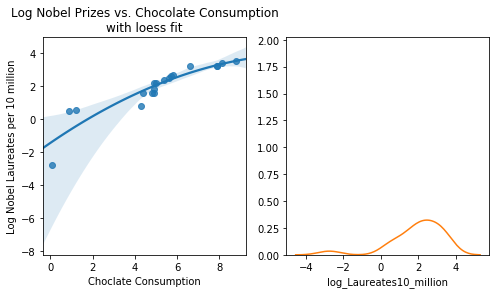

In [52]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(8,4))
sns.regplot('Chocolate', 'log_Laureates10_million', order=2, data=Nobel_chocolate, ax=ax1)
ax1.set_xlabel('Choclate Consumption')
ax1.set_ylabel('Log Nobel Laureates per 10 million')
ax1.set_title('Log Nobel Prizes vs. Chocolate Consumption\nwith loess fit')
sns.distplot(Nobel_chocolate.loc[:,'log_Laureates10_million'], bins = 15, hist=False, ax=ax2)

Text(0.5, 1, 'Nobel Prizes vs. Chocolate Consumption\nwith loess fit')

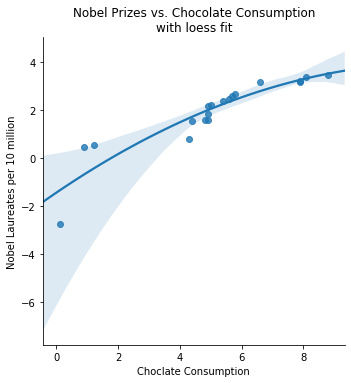

In [20]:
Nobel_chocolate.loc[:,'log_Laureates10_million'] = np.log(Nobel_chocolate.loc[:,'Laureates10_million'])

g = sns.lmplot('Chocolate', 'log_Laureates10_million', order=2, data=Nobel_chocolate)
plt.xlabel('Choclate Consumption')
plt.ylabel('Nobel Laureates per 10 million')
plt.title('Nobel Prizes vs. Chocolate Consumption\nwith loess fit')

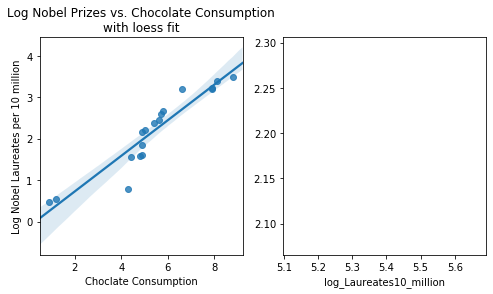

In [54]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(8,4))
sns.regplot('Chocolate', 'log_Laureates10_million', data=Nobel_chocolate.iloc[:-1,:], ax=ax1)
ax1.set_xlabel('Choclate Consumption')
ax1.set_ylabel('Log Nobel Laureates per 10 million')
ax1.set_title('Log Nobel Prizes vs. Chocolate Consumption\nwith loess fit')
sns.distplot(Nobel_chocolate.loc[:-1,'log_Laureates10_million'], bins = 15, hist=False, ax=ax2)

Text(0.5, 1, 'Nobel Prizes vs. Chocolate Consumption\nwith loess fit')

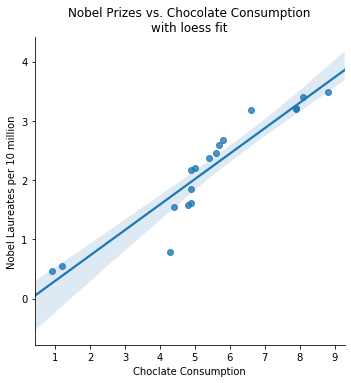

In [21]:
g = sns.lmplot('Chocolate', 'log_Laureates10_million', data=Nobel_chocolate.iloc[:-1,:])
plt.xlabel('Choclate Consumption')
plt.ylabel('Nobel Laureates per 10 million')
plt.title('Nobel Prizes vs. Chocolate Consumption\nwith loess fit')

Text(0.5, 1, 'Nobel Prizes vs. log GDP person thousands')

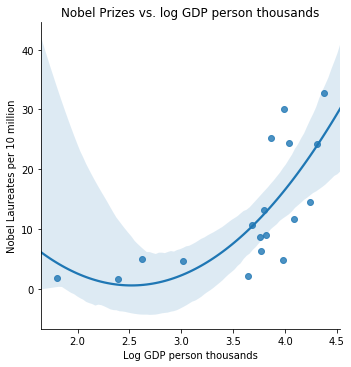

In [22]:
g = sns.lmplot('log_GDP_person_thousands', 'Laureates10_million', order=2, data=Nobel_chocolate.iloc[:-1,:])
plt.xlabel('Log GDP person thousands')
plt.ylabel('Nobel Laureates per 10 million')
plt.title('Nobel Prizes vs. log GDP person thousands')

Text(0.5, 1, 'Log Nobel Prizes vs. GDP person thousands')

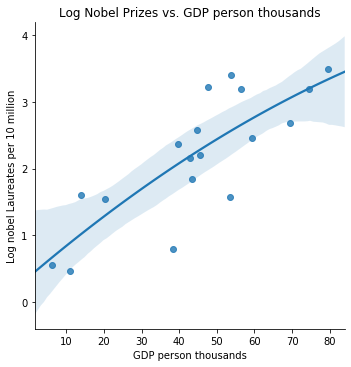

In [23]:
g = sns.lmplot('GDP_person_thousands', 'log_Laureates10_million', order=2, data=Nobel_chocolate.iloc[:-1,:])
plt.xlabel('GDP person thousands')
plt.ylabel('Log nobel Laureates per 10 million')
plt.title('Log Nobel Prizes vs. GDP person thousands')

Text(0.5, 1, 'Log Nobel Prizes vs. log GDP person thousands')

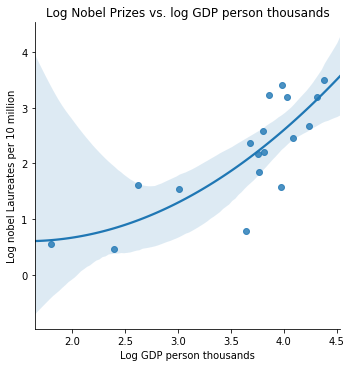

In [24]:
g = sns.lmplot('log_GDP_person_thousands', 'log_Laureates10_million', order=2, data=Nobel_chocolate.iloc[:-1,:])
plt.xlabel('Log GDP person thousands')
plt.ylabel('Log nobel Laureates per 10 million')
plt.title('Log Nobel Prizes vs. log GDP person thousands')

Text(0.5, 1.0, 'Nobel Prizes vs. Chocolate Consumption\nwith loess fit')

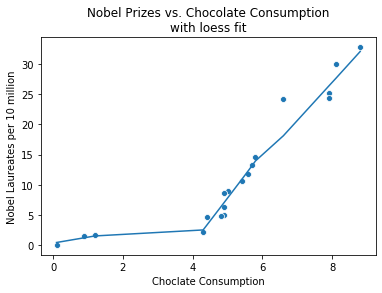

In [25]:
import statsmodels.api as sm

Nobel_chocolate.loc[:,'lowess'] = np.flip(sm.nonparametric.lowess(Nobel_chocolate.Laureates10_million, 
                                                                  Nobel_chocolate.Chocolate, 
                                                                  it=20,
                                                                  delta=0.0,
                                                                  frac=0.7)[:,1])


sns.scatterplot('Chocolate', 'Laureates10_million', data=Nobel_chocolate)
sns.lineplot('Chocolate', 'lowess', data=Nobel_chocolate)

plt.xlabel('Choclate Consumption')
plt.ylabel('Nobel Laureates per 10 million')
plt.title('Nobel Prizes vs. Chocolate Consumption\nwith loess fit')

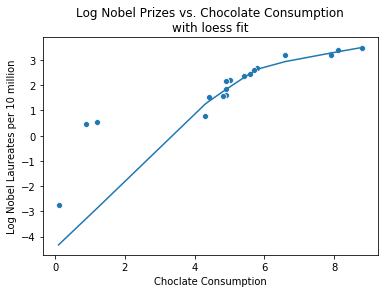

In [26]:
Nobel_chocolate.loc[:,'lowess'] = np.flip(sm.nonparametric.lowess(Nobel_chocolate.log_Laureates10_million, 
                                                                  Nobel_chocolate.Chocolate, 
                                                                  it=20,
                                                                  delta=0.0,
                                                                  frac=.7)[:,1])


sns.scatterplot('Chocolate', 'log_Laureates10_million', data=Nobel_chocolate)
sns.lineplot('Chocolate', 'lowess', data=Nobel_chocolate)

plt.xlabel('Choclate Consumption')
plt.ylabel('Log Nobel Laureates per 10 million')
_=plt.title('Log Nobel Prizes vs. Chocolate Consumption\nwith loess fit')

C:\Users\StevePC2\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


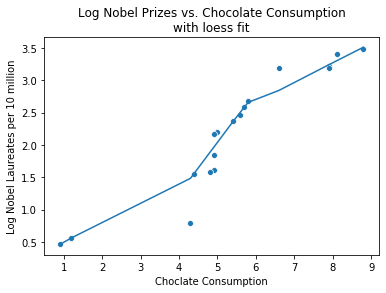

In [27]:
Nobel_chocolate_noOutlier = Nobel_chocolate.iloc[:-1,:]
Nobel_chocolate_noOutlier.loc[:,'lowess'] = np.flip(sm.nonparametric.lowess(Nobel_chocolate_noOutlier.log_Laureates10_million, 
                                                                  Nobel_chocolate_noOutlier.Chocolate, 
                                                                  it=20,
                                                                  delta=0.0,
                                                                  frac=.7)[:,1])


sns.scatterplot('Chocolate', 'log_Laureates10_million', data=Nobel_chocolate_noOutlier)
sns.lineplot('Chocolate', 'lowess', data=Nobel_chocolate_noOutlier)

plt.xlabel('Choclate Consumption')
plt.ylabel('Log Nobel Laureates per 10 million')
_=plt.title('Log Nobel Prizes vs. Chocolate Consumption\nwith loess fit')